# Message from Alyssa # 

im trying to see if there's a correlation between amnesty clauses and how well a country does in the future. So the "AMNESTY" column indicates whether there's an amnesty agreement or not... 0=no amnesty and 1=amnesty. And then there are 11 dependent variables which are the "RECUR" all the way through the "LITERACY" columns. Those dependent variables are change values-- they're just measurements of how the country's statistics change 5 years after the amnesty clause is signed. So like if the GDP value is 130.2 that means the country's GDP/capita increased by $130.2 in the five years after the amnesty.

there are other variables that indicate what kind of agreements there are but i don't really think thats necessary to look at right now cause its too much to explain hahaha anyways thank you so much!!!! if i didnt explain something well enough just lmk and ill do my best lol

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
plt.style.use('fivethirtyeight')

In [2]:
DATA_PATH = "../data/AMNESTYDATA1.csv"

In [3]:
data = pd.read_csv(DATA_PATH, 
                  encoding = "ISO-8859-1")

In [4]:
goodies = ['AGREE', 'AMNESTY', 'NOIMP', 'JUSTPRO', 'OTHERPRO',
       'RECUR', 'MORT', 'MATERNAL', 'LIFEEX', 'ELECTRIC', 'REFUGEE',
       'POPGROW', 'GDP ', 'POVERTY', 'SCHOOL', 'LITERACY']

baddies = ['CCODE', 'STATE', 'YSIGNED', 'SIGNED', 'END', 'ENDDATE', 'DDAYS',
       'NAME']

for b in baddies: 
    del data[b]

## Thought Process ## 

1. Have countplots of each column just of the raw values that exist there. 
2. Split the dataset into 2 sets: amnesty and no amnesty
3. Create countplots again of each column, but hopefully we can now see some differences between amnesty countries and no amnesty countries 
4. Pearson correlation matrix -- see how much each column is correlated with each other

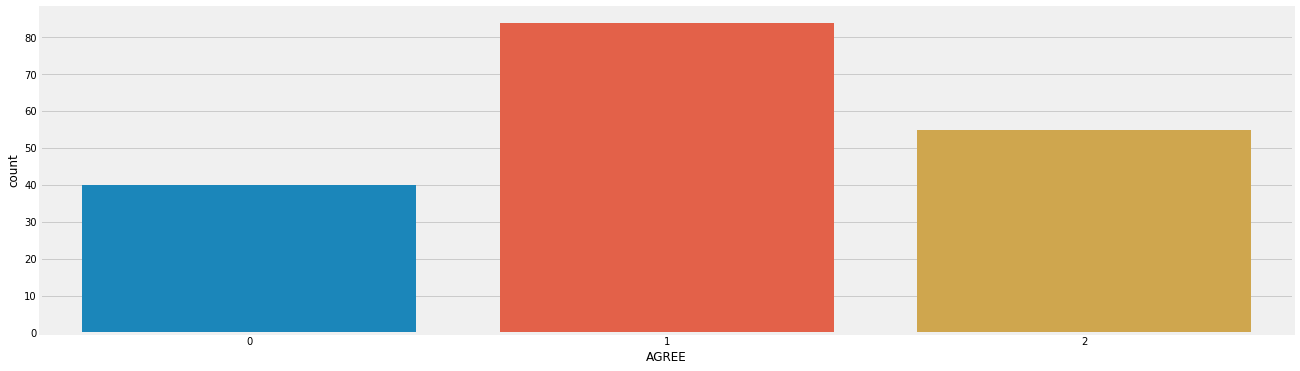

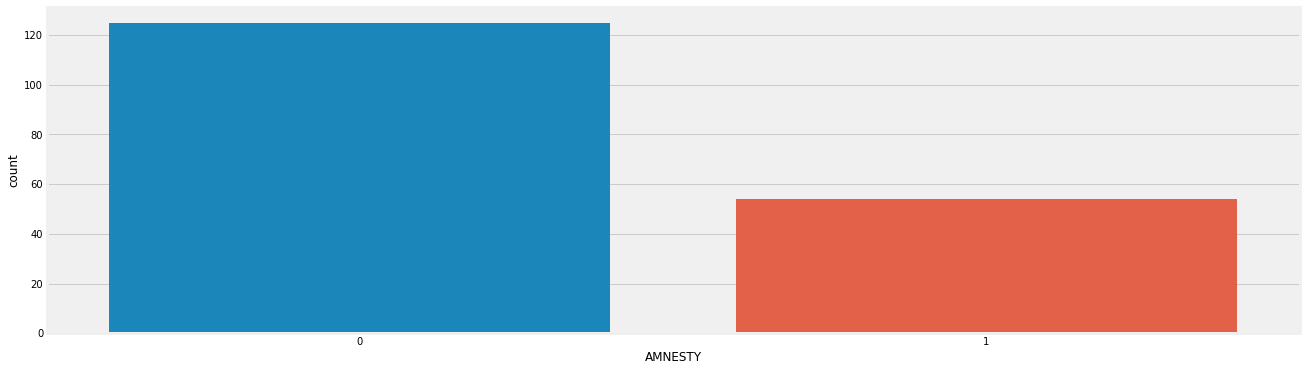

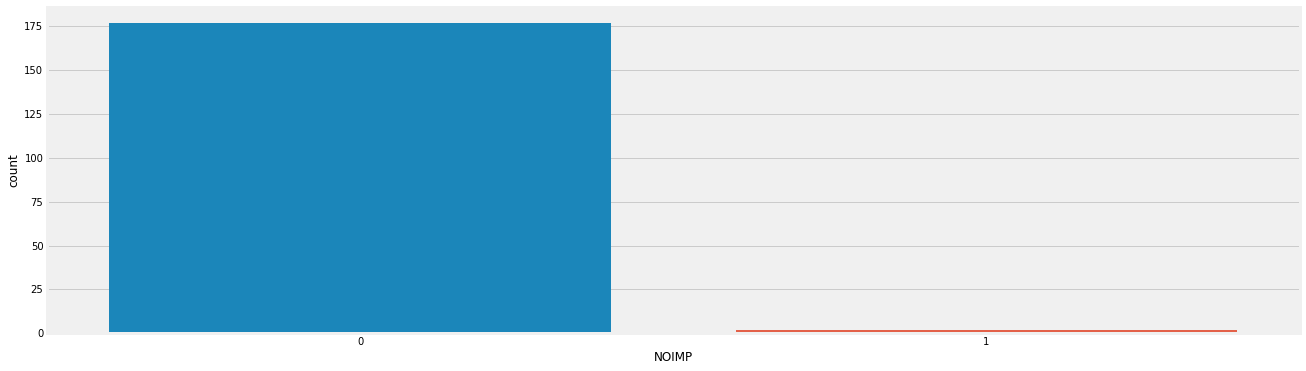

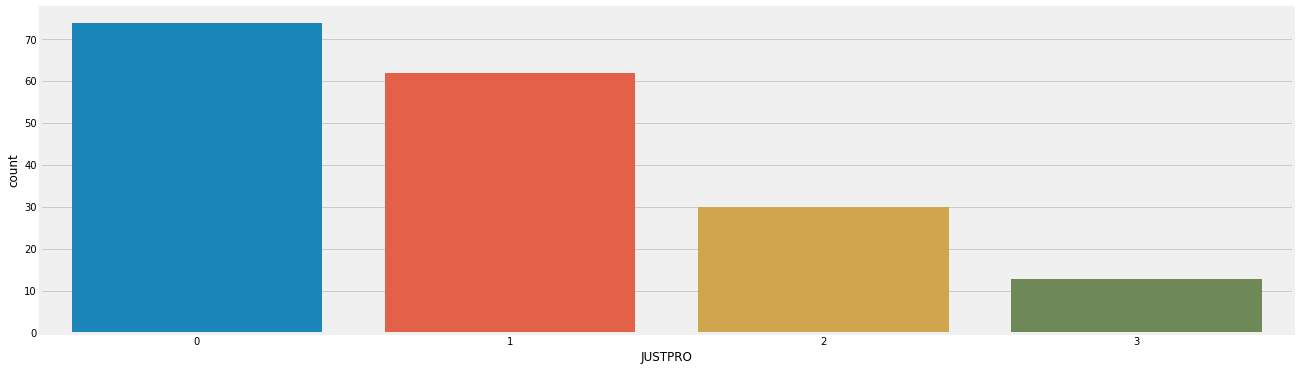

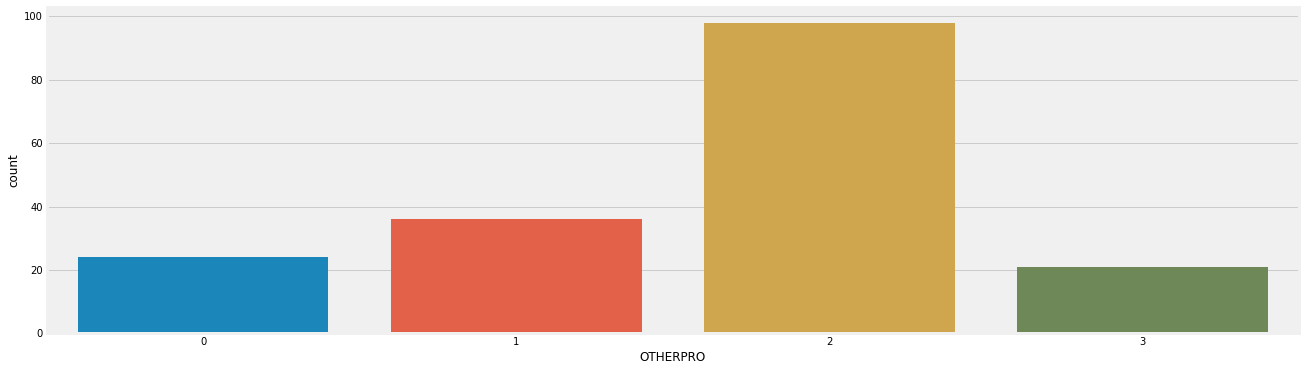

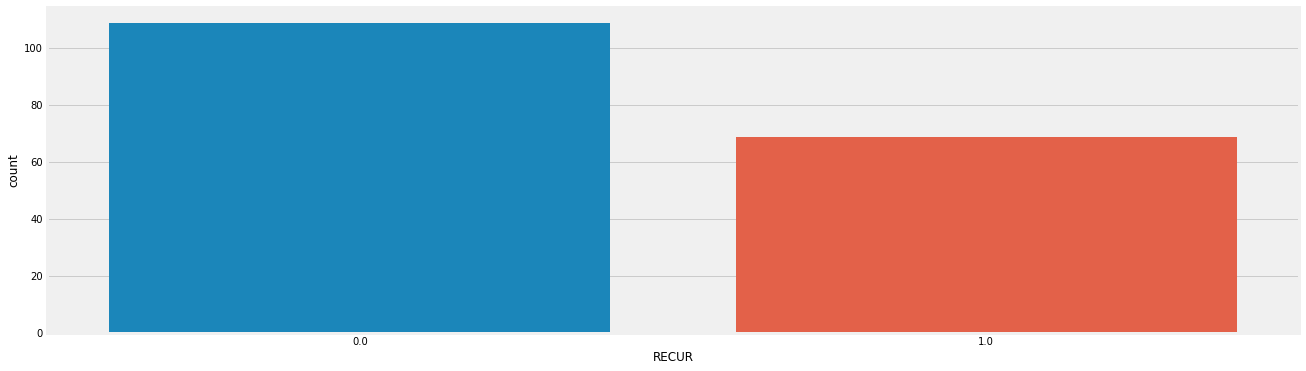

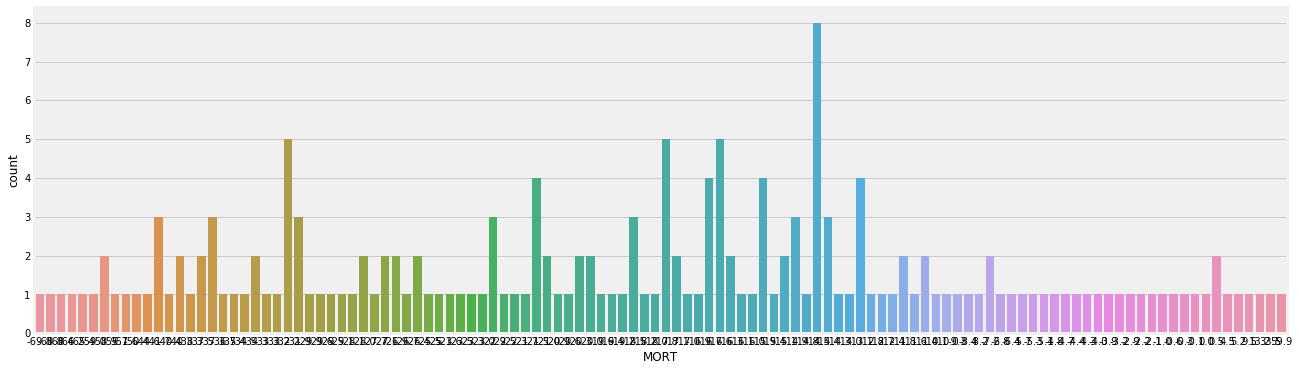

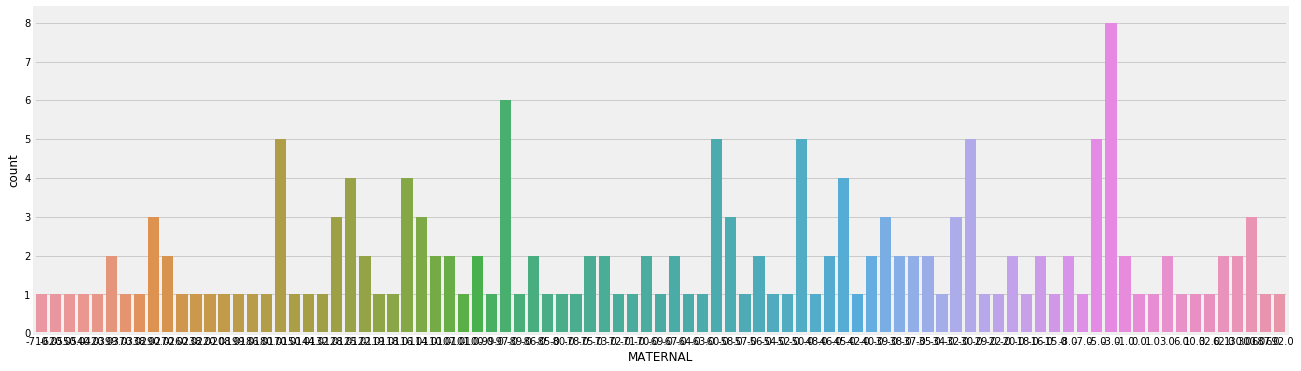

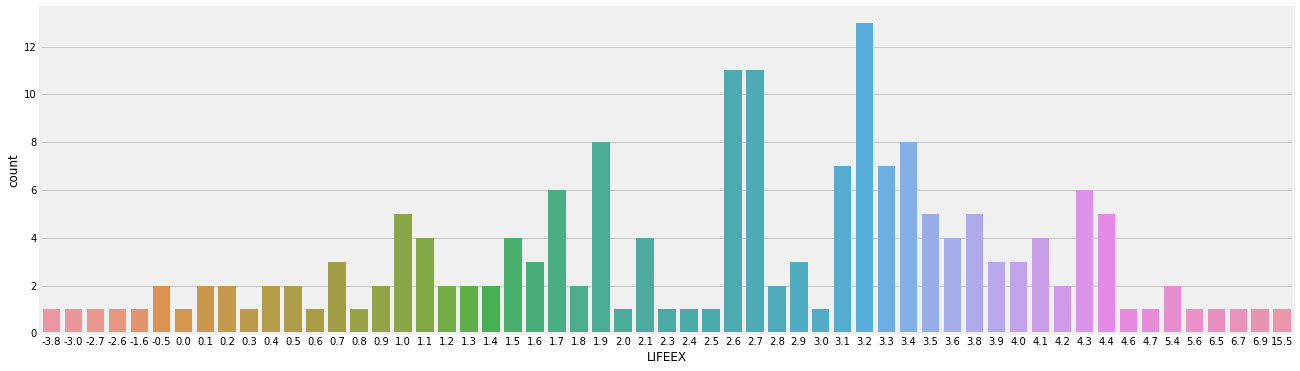

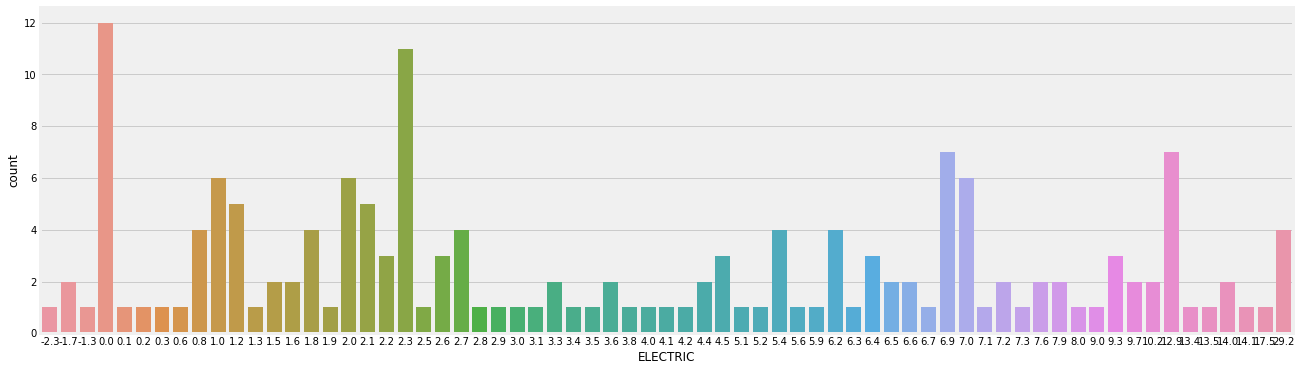

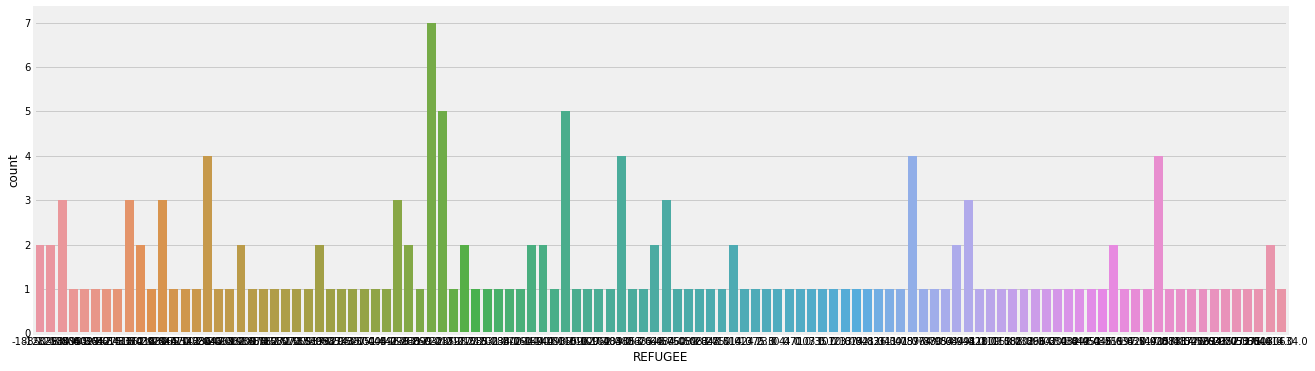

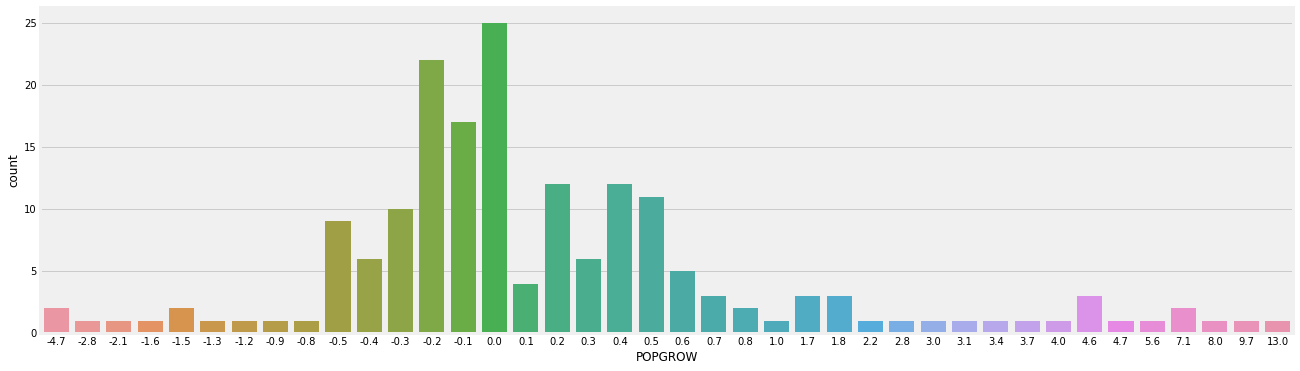

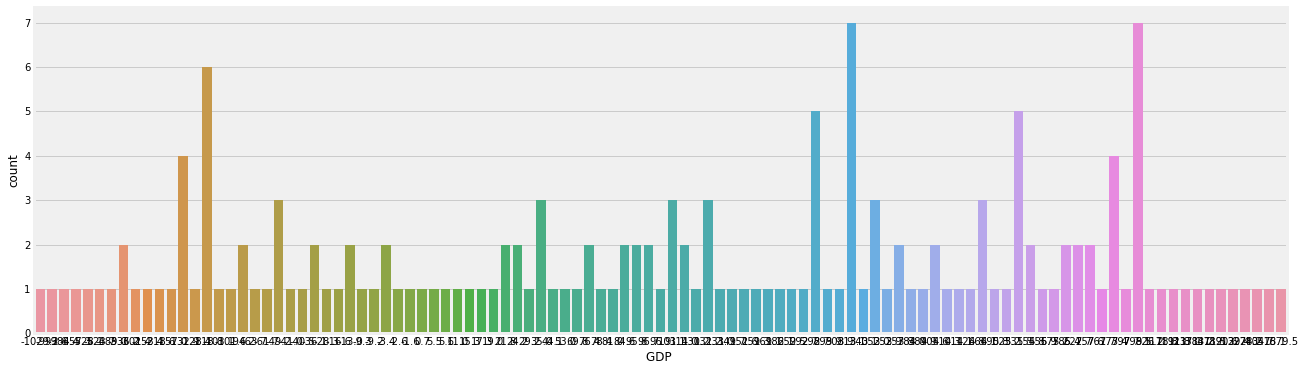

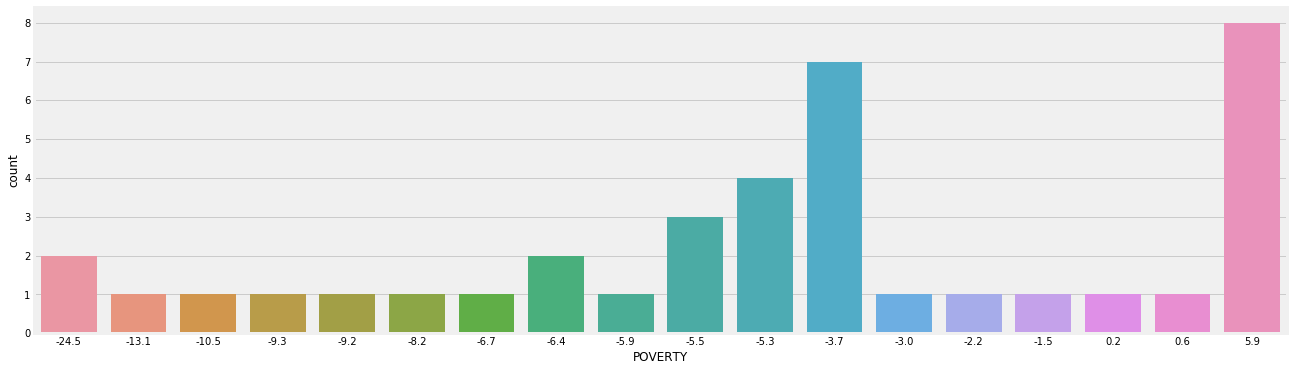

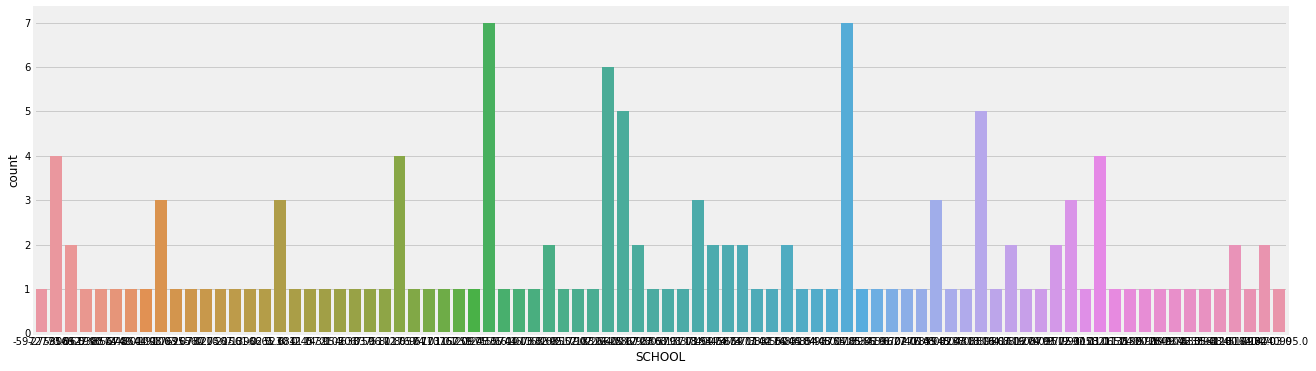

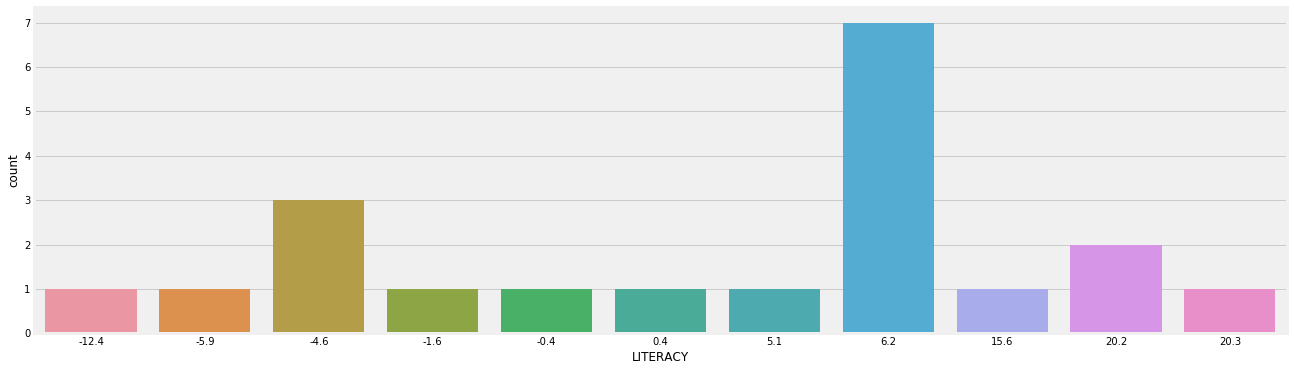

In [7]:
for col in data.columns.values:
    plot = plt.figure(figsize=(20,6))
    plot = sb.countplot(data[col])
    plot.figure.savefig("../pics/" + col + '.png')

## Pairplot ## 

/Users/calvin_wang/anaconda2/envs/main/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/calvin_wang/anaconda2/envs/main/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/calvin_wang/anaconda2/envs/main/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/calvin_wang/anaconda2/envs/main/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


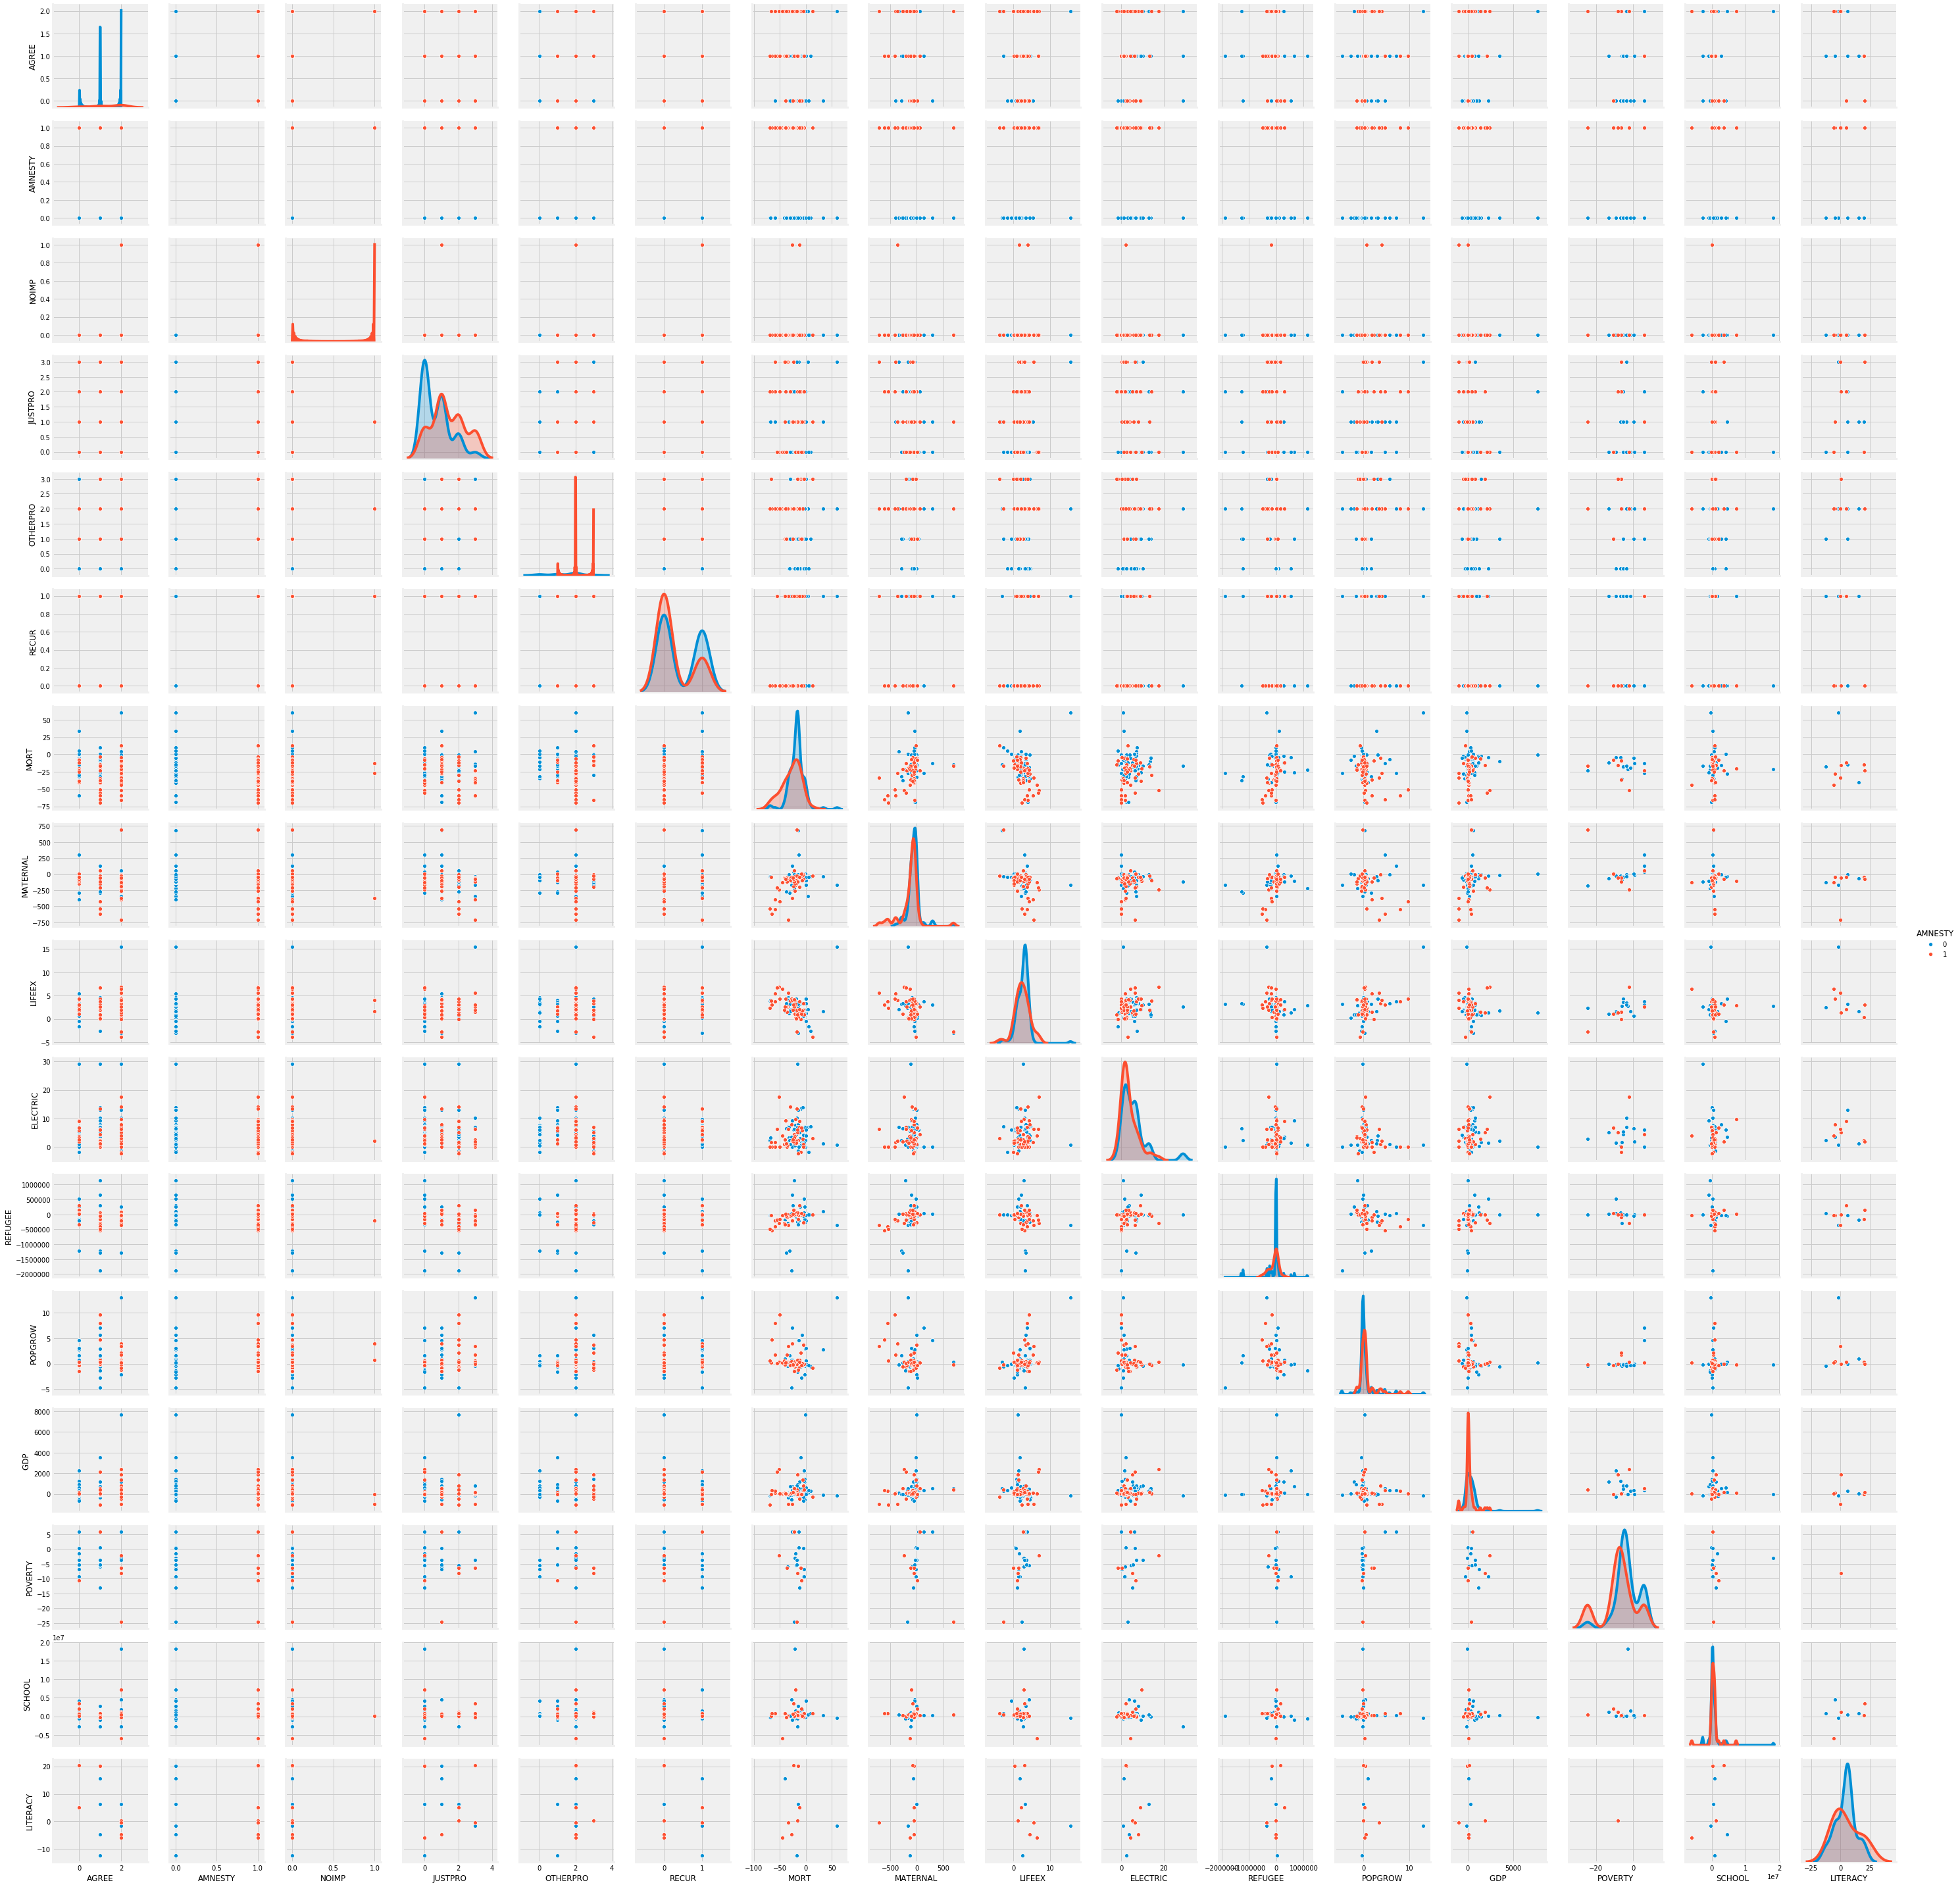

In [8]:
plot = sb.pairplot(data=data, hue='AMNESTY', diag_kind='kde')
plot.savefig("../pics/pairplot.png")

## Correlation Matrix

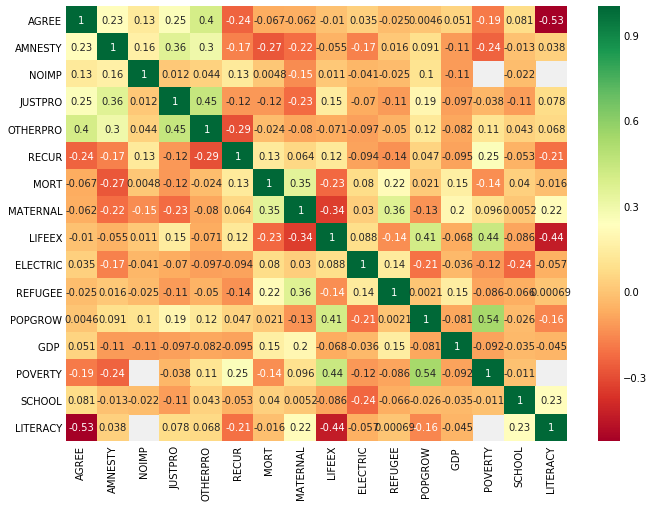

In [9]:
sb.heatmap(data.corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()
fig.savefig("../pics/correlation_matrix.png")